## **Model Training**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('datasets/Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


**Divide the features into dependent and independent features**

In [8]:
X = df.drop('FWI',axis=1)

In [9]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [10]:
y = df.loc[:,'FWI']

In [11]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

**Split the dataset**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
X_train.shape

(182, 11)

**Feature selection based on correlation**

In [15]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


Check for multicollineariry

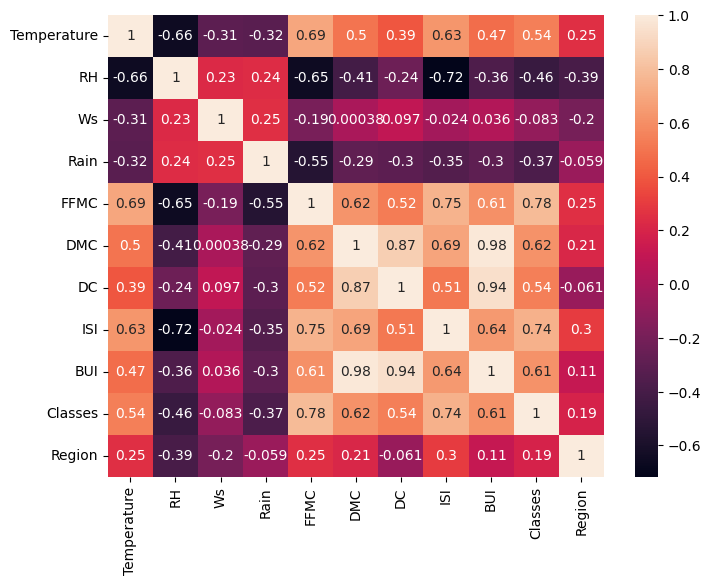

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

Get the highly correlated features

- The threshold is usually set by the domain expert

In [17]:
def correlation(dataset, threshold):
        correlated_columns = set()
        corr_mat = dataset.corr()
        
        for i in range(len(corr_mat.columns)):
            for j in range(i):
                if np.abs(corr_mat.iloc[i,j]) > threshold:
                    correlated_columns.add(corr_mat.columns[i])
        
        return list(correlated_columns)                           

In [18]:
correlated_features = correlation(X_train,0.85)
correlated_features

['BUI', 'DC']

Drop these features  

In [19]:
X_train.drop(correlated_features,axis=1,inplace=True)
X_test.drop(correlated_features,axis=1,inplace=True)

In [20]:
X_train.reset_index()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,97,29,74,19,0.1,75.8,3.6,2.1,0,0
1,141,31,72,14,0.2,60.2,3.8,0.8,0,1
2,192,40,31,15,0.0,94.2,22.5,16.6,1,1
3,68,32,60,18,0.3,77.1,11.3,2.2,0,0
4,119,32,47,14,0.7,77.5,7.1,1.8,0,0
...,...,...,...,...,...,...,...,...,...,...
177,106,24,82,15,0.4,44.9,0.9,0.2,0,0
178,14,28,80,17,3.1,49.4,3.0,0.4,0,0
179,92,25,76,17,7.2,46.0,1.3,0.2,0,0
180,179,34,59,16,0.0,88.1,19.5,7.4,1,1


In [21]:
X_test.reset_index()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,24,31,64,15,0.0,86.7,14.2,5.7,1,0
1,6,33,54,13,0.0,88.2,9.9,6.4,1,0
2,152,28,58,18,2.2,63.7,3.2,1.2,0,1
3,232,34,58,13,0.2,79.5,18.7,2.1,0,1
4,238,30,65,14,0.0,85.4,16.0,4.5,1,1
...,...,...,...,...,...,...,...,...,...,...
56,162,34,56,15,2.9,74.8,7.1,1.6,0,1
57,178,33,57,16,0.0,87.5,15.7,6.7,1,1
58,224,31,72,14,0.0,84.2,8.3,3.8,1,1
59,230,36,33,13,0.1,90.6,25.8,9.0,1,1


In [22]:
y_train.reset_index()
y_test.reset_index()

,index,FWI
0,24,8.4
1,6,7.2
2,152,0.5
3,232,3.8
4,238,6.5
...,...,...
56,162,0.8
57,178,9.0
58,224,3.9
59,230,15.4


**Feature Scaling or Standardization**

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

Boxplot to understand effect of scaling 

Text(0.5, 1.0, 'X_train after scaling')

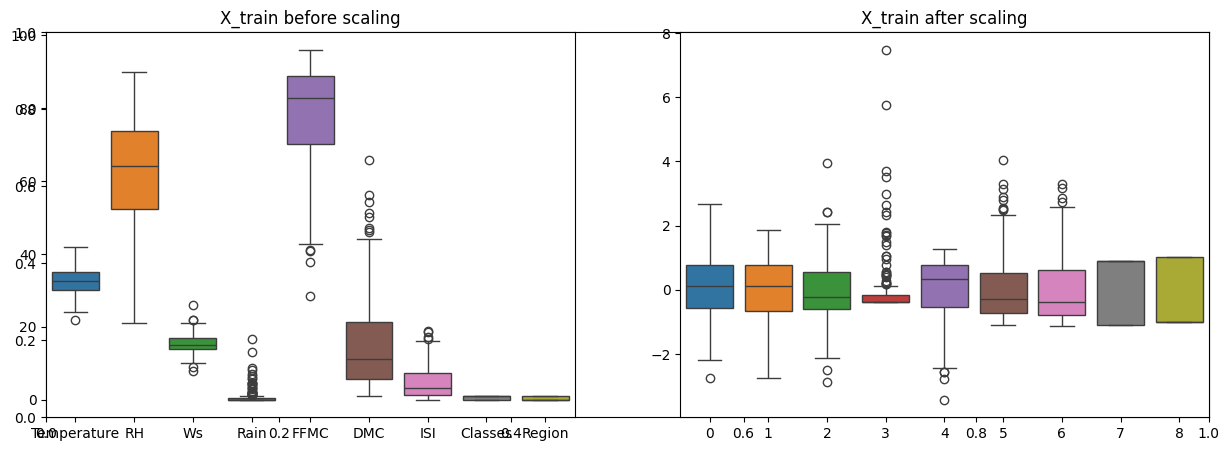

In [26]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")

### **Linear Regression Model**

In [27]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error,r2_score 

In [28]:
lr = LinearRegression()

lr.fit(X_train_scaled,y_train)

y_pred = lr.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2 Score:",r2)


Mean Absolute Error: 0.546823646524997
R2 Score: 0.9847657384266951


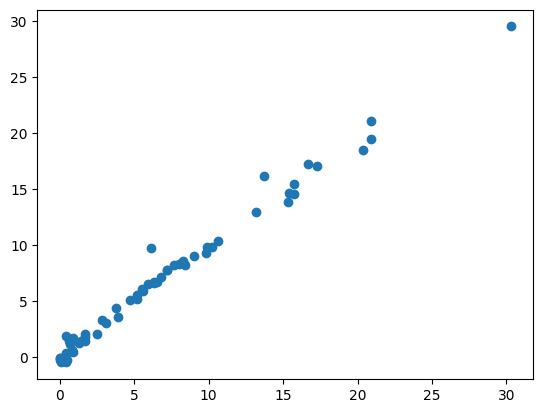

In [29]:
plt.scatter(y_test,y_pred)

### **Lasso Regression Model**

In [30]:
from sklearn.linear_model import Lasso

In [31]:
l = Lasso()

l.fit(X_train_scaled,y_train)

y_pred = l.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2 Score:",r2)

Mean Absolute Error: 1.133175994914409
R2 Score: 0.9492020263112388


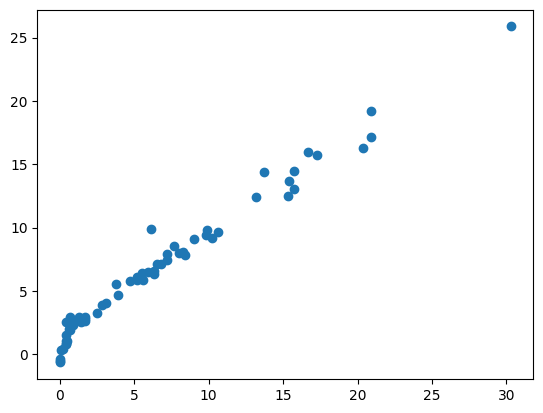

In [32]:
plt.scatter(y_test,y_pred)

### **Lasso with Cross-Validation**

In [33]:
from sklearn.linear_model import LassoCV 

In [34]:
lcv = LassoCV(cv=5)

lcv.fit(X_train_scaled,y_train)

y_pred = lcv.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2 Score:",r2)

Mean Absolute Error: 0.6199701158263431
R2 Score: 0.9820946715928275


In [35]:
lcv.alpha_

np.float64(0.05725391318234408)

In [36]:
print(lcv.alphas_)

[7.05853002 6.58280872 6.13914944 5.72539132 5.33951911 4.97965339
 4.64404142 4.33104857 4.03915039 3.76692517 3.51304702 3.27627941
 3.05546914 2.84954075 2.65749124 2.47838523 2.31135036 2.15557308
 2.01029467 1.87480753 1.74845178 1.63061198 1.52071419 1.41822315
 1.32263965 1.23349817 1.15036452 1.0728338  1.00052839 0.93309613
 0.87020857 0.81155943 0.75686304 0.705853   0.65828087 0.61391494
 0.57253913 0.53395191 0.49796534 0.46440414 0.43310486 0.40391504
 0.37669252 0.3513047  0.32762794 0.30554691 0.28495408 0.26574912
 0.24783852 0.23113504 0.21555731 0.20102947 0.18748075 0.17484518
 0.1630612  0.15207142 0.14182231 0.13226397 0.12334982 0.11503645
 0.10728338 0.10005284 0.09330961 0.08702086 0.08115594 0.0756863
 0.0705853  0.06582809 0.06139149 0.05725391 0.05339519 0.04979653
 0.04644041 0.04331049 0.0403915  0.03766925 0.03513047 0.03276279
 0.03055469 0.02849541 0.02657491 0.02478385 0.0231135  0.02155573
 0.02010295 0.01874808 0.01748452 0.01630612 0.01520714 0.01418

In [37]:
(lcv.mse_path_)

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

### **Ridge Regression Model**

In [38]:
from sklearn.linear_model import Ridge

In [39]:
r = Ridge()

r.fit(X_train_scaled,y_train)

y_pred = r.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2 Score:",r2)

Mean Absolute Error: 0.5642305340105691
R2 Score: 0.9842993364555513


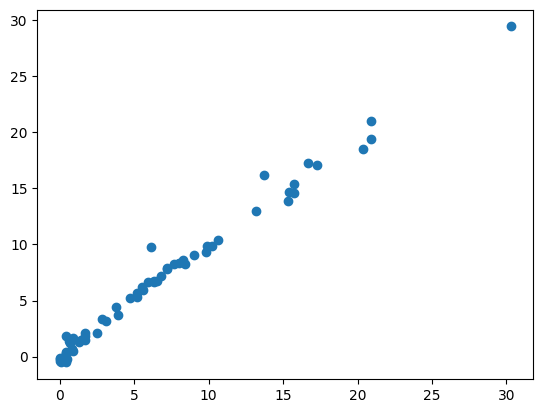

In [40]:
plt.scatter(y_test,y_pred)

### **Ridge with Cross-Validation**

In [41]:
from sklearn.linear_model import RidgeCV

In [42]:
rcv = RidgeCV(cv=5)

rcv.fit(X_train_scaled,y_train)

y_pred = rcv.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2 Score:",r2)

Mean Absolute Error: 0.5642305340105691
R2 Score: 0.9842993364555513


In [43]:
rcv.alpha_

np.float64(1.0)

### **ElasticNet Model**

In [44]:
from sklearn.linear_model import ElasticNet

In [45]:
en = ElasticNet()

en.fit(X_train_scaled,y_train)

y_pred = en.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2 Score:",r2)

Mean Absolute Error: 1.8822353634896
R2 Score: 0.8753460589519703


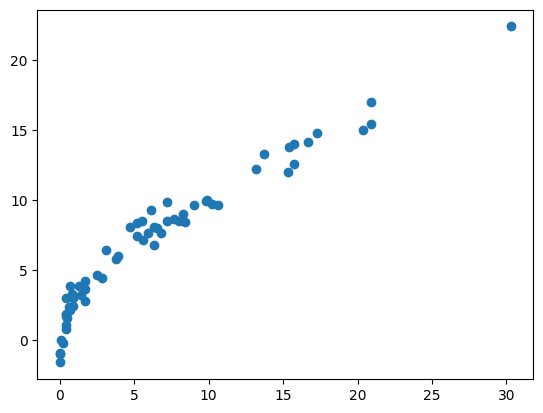

In [46]:
plt.scatter(y_test,y_pred)

### **ElasticNet with Cross-Validation**

In [47]:
from sklearn.linear_model import ElasticNetCV

In [48]:
encv = ElasticNetCV(cv=5)

encv.fit(X_train_scaled,y_train)

y_pred = encv.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2 Score:",r2)

Mean Absolute Error: 0.6575946731430901
R2 Score: 0.9814217587854941


In [49]:
encv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [50]:
encv.alpha_

np.float64(0.04311146156383891)

In [51]:
encv.l1_ratio

0.5

In [52]:
rcv

RidgeCV(cv=5)

In [53]:
scaler

StandardScaler()

In [54]:
import pickle

In [55]:
pickle.dump(rcv,open('ridge_cv.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))